In [52]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time

# Implementation of Google PageRank Algorithm

In [53]:
def pagerank(adjacency_matrix, distribution_vector, teleportation_probability=0.2, max_iterations=100, tolerance=1e-6):
    
    adjacency_matrix = np.array(adjacency_matrix, dtype=float)
    distribution_vector = np.array(distribution_vector, dtype=float)

    # Number of nodes in the graph
    num_nodes = len(adjacency_matrix)

    # Initialize PageRank scores
    pagerank_scores = np.ones(num_nodes) / num_nodes
    
    for i in range(max_iterations):
        old_scores = pagerank_scores.copy()
        
        # Calculate new PageRank scores R' = cMR' + (1-c)E
        pagerank_scores = (1-teleportation_probability) * np.dot(adjacency_matrix, pagerank_scores) +\
                          teleportation_probability * distribution_vector
            
        # Check for convergence
        if np.sum(np.abs(old_scores - pagerank_scores)) < tolerance:
            break

    print(f"Num iterations: {i}")
    return pagerank_scores


# Closed-form solution of PageRank

In [54]:
def closed_form1(adjacency_matrix, jump_distribution_vector, teleportation_probability):

    # R' = (I - (1-c)M)^-1 cE
    return np.dot(np.linalg.inv((np.identity(len(adjacency_matrix)) - \
        (1-teleportation_probability) * adjacency_matrix)), \
        (teleportation_probability * jump_distribution_vector))

def closed_form2(adjacency_matrix, jump_distribution_vector, teleportation_probability):
    
    # (1)R' = ((1-c)M + cE1^T)R'
    eigenvalues, eigenvectors = np.linalg.eig((1-teleportation_probability) * adjacency_matrix + \
    ((teleportation_probability * jump_distribution_vector) * np.ones(len(adjacency_matrix))[:,None])
)
    
    # Return eigenvecor corresponding to the largest eigenvalue (1)
    pagerank = eigenvectors[:, np.argmax(eigenvalues)]
    
    # Rescale such that the sum of the PageRank vector is 1
    pagerank /= pagerank.sum()
    
    return pagerank

# Utility function to visualise adjacency matrix as a graph

In [55]:
def generate_graph(adjacency_matrix, should_draw_labels=True, node_size=600, line_width=1, arrow_size=20, node_spacing=0.1):
    
    g1 = nx.DiGraph()
    edges = []
    
    for dst in range(len(adjacency_matrix)):
        for src in range(len(adjacency_matrix[0])):
            if adjacency_matrix[src][dst]:
                edges.append((chr(dst+65), chr(src+65), adjacency_matrix[src][dst]))
            
    g1.add_weighted_edges_from(edges)
    
    pos = nx.spring_layout(g1, k=node_spacing)
    
    nx.draw_networkx_nodes(g1, pos, node_size=node_size)
    if should_draw_labels:
        nx.draw_networkx_labels(g1, pos)
    nx.draw_networkx_edges(
        g1, pos, arrowstyle='-|>', arrowsize=arrow_size, width=line_width,
        connectionstyle="arc3,rad=0.3"
    )
    
    plt.show()
    
def are_arrays_equal(a,b):
    for i in range(len(a)):
        if abs(a[i] - b[i]) > 1e-5:
            return False
    return True

# Example in Slide 53 of Lecture 7

In [217]:
adjacency_matrix = np.array([[0, 1/2, 0, 0],
                             [1/3, 0, 0, 1/2],
                             [1/3, 0, 1, 1/2],
                             [1/3, 1/2, 0, 0]], dtype=float)
jump_distribution_vector = np.ones(len(adjacency_matrix)) / len(adjacency_matrix)
teleportation_probability = 0.2

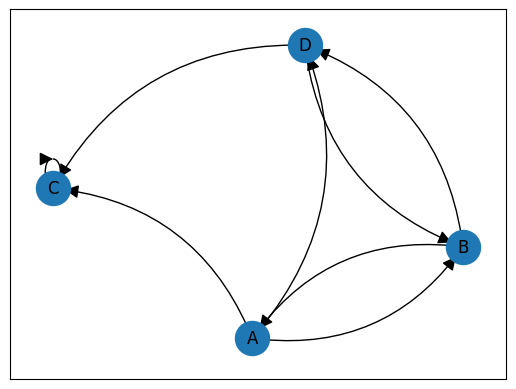

Num iterations: 24
PageRank scores: [0.10135149 0.12837858 0.64189136 0.12837858]


In [218]:
generate_graph(adjacency_matrix)
scores = pagerank(adjacency_matrix, jump_distribution_vector, teleportation_probability)
print("PageRank scores:", scores)

## Validation with closed-form solution

[0.10135149 0.12837858 0.64189136 0.12837858]
[0.10135135 0.12837838 0.64189189 0.12837838]
[0.10135135 0.12837838 0.64189189 0.12837838]
Converged to closed-form solution: True


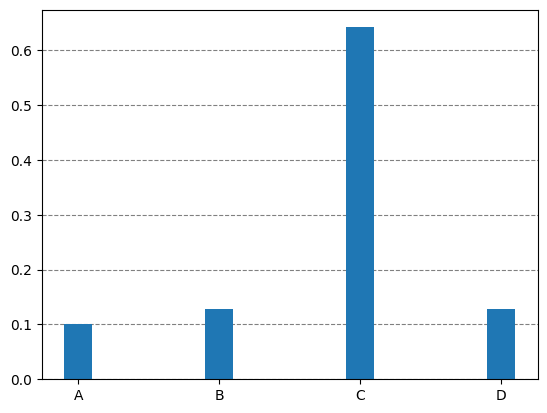

In [219]:
closed_form1_pagerank = closed_form1(adjacency_matrix, jump_distribution_vector, teleportation_probability)
closed_form2_pagerank = closed_form2(adjacency_matrix, jump_distribution_vector, teleportation_probability)

# matching = scores==closed_form1_pagerank and scores==closed_form2_pagerank

print(scores)
print(closed_form1_pagerank)
print(closed_form2_pagerank)
print(f"Converged to closed-form solution: {are_arrays_equal(scores,closed_form1_pagerank) and are_arrays_equal(scores,closed_form2_pagerank)}")

X = ['A','B','C','D']
x = np.arange(4)
ax = plt.subplot(111)
plt.xticks(x, X) 
ax.bar(x, scores, width=0.2, color='tab:blue', align='center')
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')

# Tuning teleportation probability

In [56]:
adjacency_matrix = np.array([[0, 1/2, 0, 0],
                    [1/3, 0, 0, 1/2],
                    [1/3, 0, 1, 1/2],
                    [1/3, 1/2, 0, 0]], dtype=float)

jump_distribution_vector = np.ones(len(adjacency_matrix)) / len(adjacency_matrix)

low_teleportation_probability = 0.2

mid_teleportation_probability = 0.5

high_teleportation_probability = 0.8

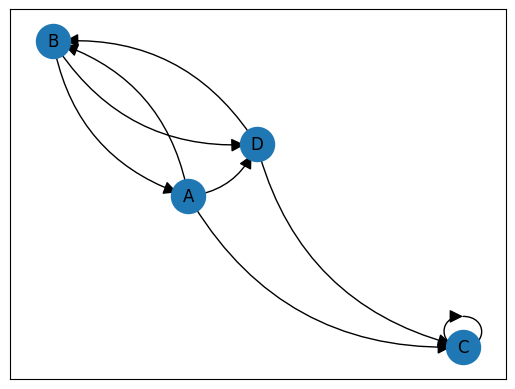

Num iterations: 24
Num iterations: 13
Num iterations: 6
PageRank scores: [0.10135149 0.12837858 0.64189136 0.12837858]
PageRank scores: [0.17647062 0.2058824  0.41176459 0.2058824 ]
PageRank scores: [0.22388061 0.23880599 0.2985074  0.23880599]


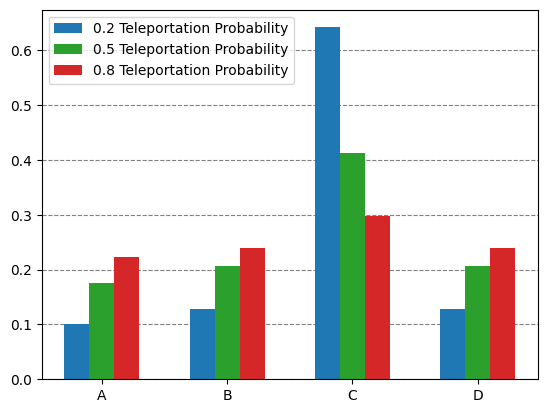

In [72]:
generate_graph(adjacency_matrix)

low_tp_scores = pagerank(adjacency_matrix, jump_distribution_vector, low_teleportation_probability)
mid_tp_scores = pagerank(adjacency_matrix, jump_distribution_vector, mid_teleportation_probability)
high_tp_scores = pagerank(adjacency_matrix, jump_distribution_vector, high_teleportation_probability)

print("PageRank scores:", low_tp_scores)
print("PageRank scores:", mid_tp_scores)
print("PageRank scores:", high_tp_scores)

X = ['A','B','C','D']
x = np.arange(4)
ax = plt.subplot(111)
plt.xticks(x, X) 
ax.bar(x-0.2, low_tp_scores, width=0.2, color='tab:blue', align='center', label='0.2 Teleportation Probability')
ax.bar(x, mid_tp_scores, width=0.2, color='tab:green', align='center', label='0.5 Teleportation Probability')
ax.bar(x+0.2, high_tp_scores, width=0.2, color='tab:red', align='center', label='0.8 Teleportation Probability')
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
plt.legend(loc='upper left')

# Tuning Web graph matrix M

In [126]:
adjacency_matrix1 = np.array([[1/4, 1/4, 1/4, 1/4],
                              [1/4, 1/4, 1/4, 1/4],
                              [1/4, 1/4, 1/4, 1/4],
                              [1/4, 1/4, 1/4, 1/4]], dtype=float)

adjacency_matrix2 = np.array([[1/4, 0, 0, 0],
                              [1/4, 1, 0, 0],
                              [1/4, 0, 1, 0],
                              [1/4, 0, 0, 1]], dtype=float)

adjacency_matrix3 = np.array([[1, 0, 0, 0],
                              [0, 1, 0, 0],
                              [0, 0, 1, 0],
                              [0, 0, 0, 1]], dtype=float)

jump_distribution_vector =  np.ones(len(adjacency_matrix)) / len(adjacency_matrix)

teleportation_probability = 0.2

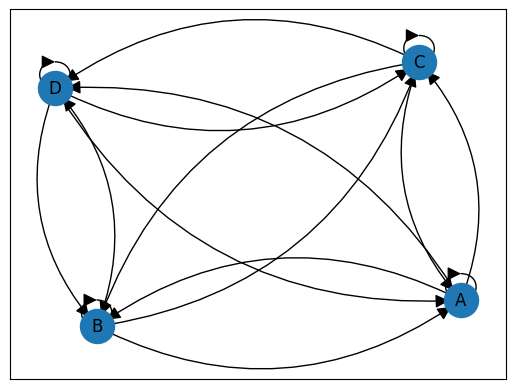

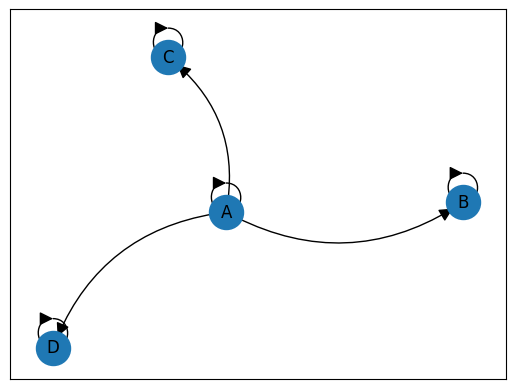

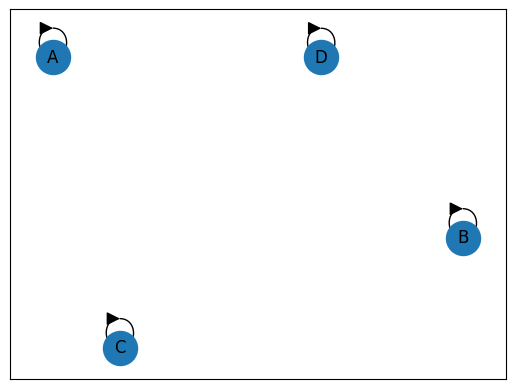

Num iterations: 0
Num iterations: 8
Num iterations: 0
PageRank scores: [0.25 0.25 0.25 0.25]
PageRank scores: [0.0625001  0.31249997 0.31249997 0.31249997]
PageRank scores: [0.25 0.25 0.25 0.25]


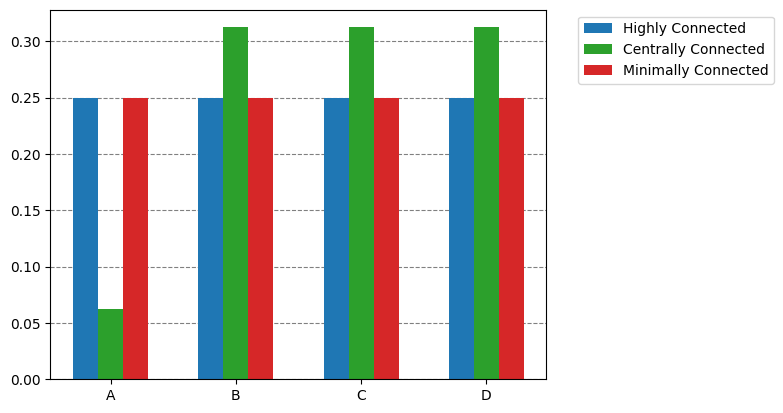

In [206]:
generate_graph(adjacency_matrix1)
generate_graph(adjacency_matrix2)
generate_graph(adjacency_matrix3)

am1_scores = pagerank(adjacency_matrix1, jump_distribution_vector, teleportation_probability)
am2_scores = pagerank(adjacency_matrix2, jump_distribution_vector, teleportation_probability)
am3_scores = pagerank(adjacency_matrix3, jump_distribution_vector, teleportation_probability)

print("PageRank scores:", am1_scores)
print("PageRank scores:", am2_scores)
print("PageRank scores:", am3_scores)

X = ['A','B','C','D']
x = np.arange(4)
ax = plt.subplot(111)
plt.xticks(x, X) 
ax.bar(x-0.2, am1_scores, width=0.2, color='tab:blue', align='center', label='Highly Connected')
ax.bar(x, am2_scores, width=0.2, color='tab:green', align='center', label='Centrally Connected')
ax.bar(x+0.2, am3_scores, width=0.2, color='tab:red', align='center', label='Minimally Connected')
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
plt.legend(bbox_to_anchor=(1.05, 1.0),loc='best')

# Tuning distribution vector E

In [220]:
adjacency_matrix = np.array([[0, 1/2, 0, 0],
                             [1/3, 0, 0, 1/2],
                             [1/3, 0, 1, 1/2],
                             [1/3, 1/2, 0, 0]], dtype=float)

jump_distribution_vector1 = [0.1,0.1,0.7,0.1]

jump_distribution_vector2 = [1,0,0,0]

jump_distribution_vector3 = [0,0,1,0]

teleportation_probability = 0.7

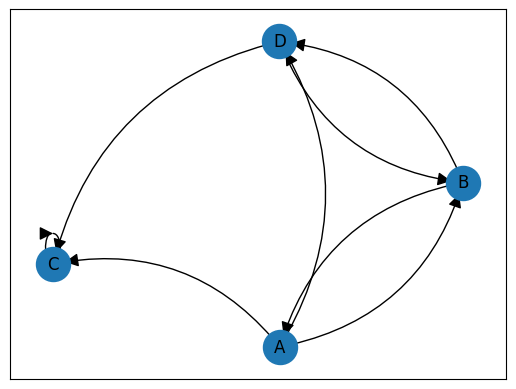

Num iterations: 9
Num iterations: 8
Num iterations: 10
PageRank scores: [0.08383237 0.09221561 0.73173641 0.09221561]
PageRank scores: [0.71257482 0.0838323  0.11976058 0.0838323 ]
PageRank scores: [1.03716980e-08 1.51160120e-08 9.99999959e-01 1.51160120e-08]


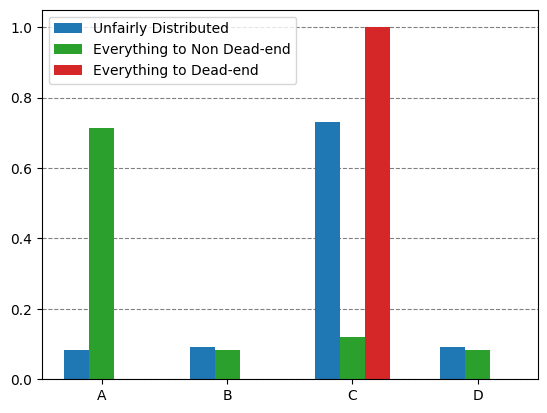

In [221]:
generate_graph(adjacency_matrix)

jt1_scores = pagerank(adjacency_matrix, jump_distribution_vector1, teleportation_probability)
jt2_scores = pagerank(adjacency_matrix, jump_distribution_vector2, teleportation_probability)
jt3_scores = pagerank(adjacency_matrix, jump_distribution_vector3, teleportation_probability)

print("PageRank scores:", jt1_scores)
print("PageRank scores:", jt2_scores)
print("PageRank scores:", jt3_scores)

X = ['A','B','C','D']
x = np.arange(4)
ax = plt.subplot(111)
plt.xticks(x, X) 
ax.bar(x-0.2, jt1_scores, width=0.2, color='tab:blue', align='center', label='Unfairly Distributed')
ax.bar(x, jt2_scores, width=0.2, color='tab:green', align='center', label='Everything to Non Dead-end')
ax.bar(x+0.2, jt3_scores, width=0.2, color='tab:red', align='center', label='Everything to Dead-end')
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
plt.legend(loc='best')

# Larger graphs

In [28]:
n = 100
num_links = 0

adjacency_matrix = np.random.rand(n,n)
for i in range(n):
    for j in range(n):
        if adjacency_matrix[i][j] < 0.95:
            adjacency_matrix[i][j]=0
        else:
            num_links += 1
            
print(f"Number of links: {num_links}")

adjacency_matrix /= adjacency_matrix.sum(axis=0)

jump_distribution_vector =  np.ones(len(adjacency_matrix)) / len(adjacency_matrix)

teleportation_probability = 0.2        

Number of links: 537


In [29]:
t0_100 = time.time()
score1 = pagerank(adjacency_matrix, jump_distribution_vector, teleportation_probability)
t1_100 = time.time()
score2 = closed_form1(adjacency_matrix, jump_distribution_vector, teleportation_probability)
t2_100 = time.time()
score3 = closed_form2(adjacency_matrix, jump_distribution_vector, teleportation_probability)
t3_100 = time.time()
print(t1_100-t0_100,t2_100-t1_100,t3_100-t2_100)

Num iterations: 13
0.0049860477447509766 0.015631437301635742 0.008716821670532227


In [32]:
n = 500
num_links = 0

adjacency_matrix = np.random.rand(n,n)
for i in range(n):
    for j in range(n):
        if adjacency_matrix[i][j] < 0.95:
            adjacency_matrix[i][j]=0
        else:
            num_links += 1
            
print(f"Number of links: {num_links}")

adjacency_matrix /= adjacency_matrix.sum(axis=0)

jump_distribution_vector =  np.ones(len(adjacency_matrix)) / len(adjacency_matrix)

teleportation_probability = 0.2        

Number of links: 12643


In [33]:
t0_500 = time.time()
score1 = pagerank(adjacency_matrix, jump_distribution_vector, teleportation_probability)
t1_500 = time.time()
score2 = closed_form1(adjacency_matrix, jump_distribution_vector, teleportation_probability)
t2_500 = time.time()
score3 = closed_form2(adjacency_matrix, jump_distribution_vector, teleportation_probability)
t3_500 = time.time()
print(t1_500-t0_500,t2_500-t1_500,t3_500-t2_500)

Num iterations: 7
0.003951072692871094 0.03329920768737793 0.20483064651489258


In [42]:
n = 1000
num_links = 0

adjacency_matrix = np.random.rand(n,n)
for i in range(n):
    for j in range(n):
        if adjacency_matrix[i][j] < 0.95:
            adjacency_matrix[i][j]=0
        else:
            num_links += 1
            
print(f"Number of links: {num_links}")

adjacency_matrix /= adjacency_matrix.sum(axis=0)

jump_distribution_vector =  np.ones(len(adjacency_matrix)) / len(adjacency_matrix)

teleportation_probability = 0.2        

Number of links: 50336


In [43]:
t0_1000 = time.time()
score1 = pagerank(adjacency_matrix, jump_distribution_vector, teleportation_probability)
t1_1000 = time.time()
score2 = closed_form1(adjacency_matrix, jump_distribution_vector, teleportation_probability)
t2_1000 = time.time()
score3 = closed_form2(adjacency_matrix, jump_distribution_vector, teleportation_probability)
t3_1000 = time.time()
print(t1_1000-t0_1000,t2_1000-t1_1000,t3_1000-t2_1000)

Num iterations: 6
0.01177835464477539 0.09051895141601562 0.9876720905303955


In [44]:
n = 10000
num_links = 0

adjacency_matrix = np.random.rand(n,n)
for i in range(n):
    for j in range(n):
        if adjacency_matrix[i][j] < 0.95:
            adjacency_matrix[i][j]=0
        else:
            num_links += 1
            
print(f"Number of links: {num_links}")

adjacency_matrix /= adjacency_matrix.sum(axis=0)

jump_distribution_vector =  np.ones(len(adjacency_matrix)) / len(adjacency_matrix)

teleportation_probability = 0.2        

Number of links: 4999977


In [45]:
t0_10000 = time.time()
score1 = pagerank(adjacency_matrix, jump_distribution_vector, teleportation_probability)
t1_10000 = time.time()
score2 = closed_form1(adjacency_matrix, jump_distribution_vector, teleportation_probability)
t2_10000 = time.time()
score3 = closed_form2(adjacency_matrix, jump_distribution_vector, teleportation_probability)
t3_10000 = time.time()
print(t1_10000-t0_10000,t2_10000-t1_10000,t3_10000-t2_10000)

Num iterations: 4
0.690809965133667 47.55455946922302 628.6408903598785


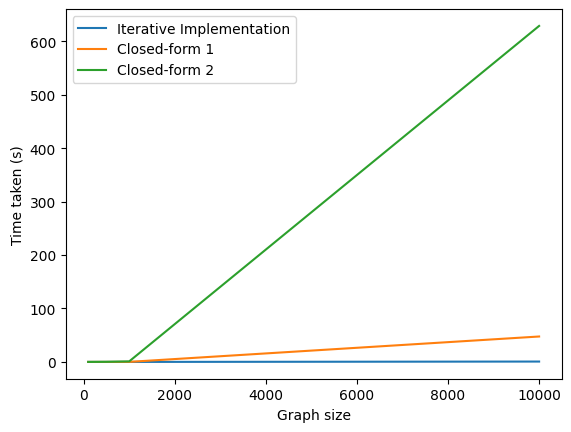

In [50]:
x = [100, 500, 1000, 10000]
iterative_time = [t1_100-t0_100,t1_500-t0_500,t1_1000-t0_1000,t1_10000-t0_10000]
closed_form1_time = [t2_100-t1_100,t2_500-t1_500,t2_1000-t1_1000,t2_10000-t1_10000]
closed_form2_time = [t3_100-t2_100,t3_500-t2_500,t3_1000-t2_1000,t3_10000-t2_10000]

plt.plot(x, iterative_time, label='Iterative Implementation')
plt.plot(x, closed_form1_time, label='Closed-form 1')
plt.plot(x, closed_form2_time, label='Closed-form 2')
plt.ylabel('Time taken (s)')
plt.xlabel('Graph size')
plt.legend()